# Perhitungan Skor RNN-IDS

## Import All Necessary Libraries

In [23]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import math

## Load All the Data

In [24]:
df_pred = pd.read_csv('/home/apta/neuralnetwork-AD/rnn-apta/results/vector/Monday-WorkingHours_training_21/result-lstm-tcp21-hl2-seq2-do0.2-oov3500-part_1_21_Treatment.csv', 
                      names=['id', 'binary_error', 'b_mean', 'b_iqr', 'b_zscore', 'floatin_error', 'f_mean', 'f_iqr', 'f_zscore'])

df_truth = pd.read_csv('/home/apta/neuralnetwork-AD/rnn-apta/texts_retraining_21/part_1_ground_truth_21_Treatment.csv', 
                       encoding='ISO-8859-1')


In [25]:
df_pred.head()

,id,binary_error,b_mean,b_iqr,b_zscore,floatin_error,f_mean,f_iqr,f_zscore
0,192.168.10.8-49558-192.168.10.50-21-tcp,0.344828,0,0,0,4934.623529,0,0,0
1,192.168.10.51-33238-192.168.10.50-21-tcp,0.344828,0,0,0,4523.764706,0,0,0
2,192.168.10.15-54041-192.168.10.50-21-tcp,0.344828,0,0,0,5192.070588,0,0,0
3,192.168.10.25-52573-192.168.10.50-21-tcp,0.333333,0,0,0,3293.000000,0,0,0
4,192.168.10.8-55551-192.168.10.50-21-tcp,0.367816,0,0,0,4777.223529,0,0,0


In [26]:
df_truth.head()

,ID,Label
0,192.168.10.8-49558-192.168.10.50-21-tcp,BENIGN
1,192.168.10.51-33238-192.168.10.50-21-tcp,BENIGN
2,192.168.10.15-54041-192.168.10.50-21-tcp,BENIGN
3,192.168.10.25-52573-192.168.10.50-21-tcp,BENIGN
4,192.168.10.8-55551-192.168.10.50-21-tcp,BENIGN


In [27]:
df_pred[['b_iqr']].value_counts()

b_iqr
1        370
0        170
Name: count, dtype: int64

## Exploratory Data Analysis

In [28]:
df_pred[['b_iqr']].value_counts()

b_iqr
1        370
0        170
Name: count, dtype: int64

In [29]:
df_pred[['b_zscore']].value_counts()

b_zscore
1           356
0           184
Name: count, dtype: int64

In [30]:
df_truth.isnull().sum()

ID       0
Label    0
dtype: int64

## Data Pre-Processing

### Convert the type of the data

In [31]:
df_truth['Label'].head()

0    BENIGN
1    BENIGN
2    BENIGN
3    BENIGN
4    BENIGN
Name: Label, dtype: object

## Making Predictions

In [32]:
df_pred["id"]

0       192.168.10.8-49558-192.168.10.50-21-tcp
1      192.168.10.51-33238-192.168.10.50-21-tcp
2      192.168.10.15-54041-192.168.10.50-21-tcp
3      192.168.10.25-52573-192.168.10.50-21-tcp
4       192.168.10.8-55551-192.168.10.50-21-tcp
                         ...                   
535       172.16.0.1-57724-192.168.10.50-21-tcp
536       172.16.0.1-54454-192.168.10.50-21-tcp
537       172.16.0.1-57018-192.168.10.50-21-tcp
538       172.16.0.1-57278-192.168.10.50-21-tcp
539       172.16.0.1-57694-192.168.10.50-21-tcp
Name: id, Length: 540, dtype: object

In [33]:
df_truth["ID"]

# df_truth[df_truth["id"] == "192.168.10.50-21-172.16.0.1-52120-tcp"]

0       192.168.10.8-49558-192.168.10.50-21-tcp
1      192.168.10.51-33238-192.168.10.50-21-tcp
2      192.168.10.15-54041-192.168.10.50-21-tcp
3      192.168.10.25-52573-192.168.10.50-21-tcp
4       192.168.10.8-55551-192.168.10.50-21-tcp
                         ...                   
535       172.16.0.1-57724-192.168.10.50-21-tcp
536       172.16.0.1-54454-192.168.10.50-21-tcp
537       172.16.0.1-57018-192.168.10.50-21-tcp
538       172.16.0.1-57278-192.168.10.50-21-tcp
539       172.16.0.1-57694-192.168.10.50-21-tcp
Name: ID, Length: 540, dtype: object

In [34]:
# Convert 'Label' column to numeric: BENIGN -> 0, other -> 1
df_truth['Label'] = df_truth['Label'].apply(lambda x: 0 if x == 'BENIGN' else 1)

In [35]:
# df_pred["Label"] = np.where(df_pred["id"].isin(df_truth["id"]), 1, 0)

# Rename 'ID' to 'id' in df_truth
df_truth = df_truth.rename(columns={'ID': 'id'})

# Now merge and drop rows where the label is missing
df_pred = df_pred.merge(df_truth[['id', 'Label']], on='id', how='left')
df_pred = df_pred.dropna(subset=['Label'])


In [36]:
df_pred[df_pred['Label']==1]

,id,binary_error,b_mean,b_iqr,b_zscore,floatin_error,f_mean,f_iqr,f_zscore,Label
88,172.16.0.1-58178-192.168.10.50-21-tcp,0.540541,1,1,1,7361.971429,1,1,0,1
89,172.16.0.1-52858-192.168.10.50-21-tcp,0.514286,1,1,1,11665.515152,1,1,1,1
90,172.16.0.1-54772-192.168.10.50-21-tcp,0.500000,1,1,1,6258.812500,1,0,0,1
101,172.16.0.1-55530-192.168.10.50-21-tcp,0.413793,1,0,0,7843.518519,1,1,1,1
102,172.16.0.1-58442-192.168.10.50-21-tcp,0.560976,1,1,1,4797.102564,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
541,172.16.0.1-57724-192.168.10.50-21-tcp,0.500000,1,1,1,9648.264706,1,1,1,1
542,172.16.0.1-54454-192.168.10.50-21-tcp,0.556604,1,1,1,9880.538462,1,1,1,1
543,172.16.0.1-57018-192.168.10.50-21-tcp,0.500000,1,1,1,5744.468750,0,0,0,1
544,172.16.0.1-57278-192.168.10.50-21-tcp,0.552632,1,1,1,8725.805556,1,1,1,1


In [37]:
df_pred[df_pred['Label']==0]

,id,binary_error,b_mean,b_iqr,b_zscore,floatin_error,f_mean,f_iqr,f_zscore,Label
0,192.168.10.8-49558-192.168.10.50-21-tcp,0.344828,0,0,0,4934.623529,0,0,0,0
1,192.168.10.51-33238-192.168.10.50-21-tcp,0.344828,0,0,0,4523.764706,0,0,0,0
2,192.168.10.15-54041-192.168.10.50-21-tcp,0.344828,0,0,0,5192.070588,0,0,0,0
3,192.168.10.25-52573-192.168.10.50-21-tcp,0.333333,0,0,0,3293.000000,0,0,0,0
4,192.168.10.8-55551-192.168.10.50-21-tcp,0.367816,0,0,0,4777.223529,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
508,192.168.10.51-52536-192.168.10.50-21-tcp,0.344828,0,0,0,4231.035294,0,0,0,0
509,192.168.10.15-52112-192.168.10.50-21-tcp,0.379310,0,0,0,4054.811765,0,0,0,0
515,192.168.10.15-53930-192.168.10.50-21-tcp,0.356322,0,0,0,3706.494118,0,0,0,0
532,192.168.10.5-49686-192.168.10.50-21-tcp,0.367816,0,0,0,3247.305882,0,0,0,0


In [38]:
df_pred

,id,binary_error,b_mean,b_iqr,b_zscore,floatin_error,f_mean,f_iqr,f_zscore,Label
0,192.168.10.8-49558-192.168.10.50-21-tcp,0.344828,0,0,0,4934.623529,0,0,0,0
1,192.168.10.51-33238-192.168.10.50-21-tcp,0.344828,0,0,0,4523.764706,0,0,0,0
2,192.168.10.15-54041-192.168.10.50-21-tcp,0.344828,0,0,0,5192.070588,0,0,0,0
3,192.168.10.25-52573-192.168.10.50-21-tcp,0.333333,0,0,0,3293.000000,0,0,0,0
4,192.168.10.8-55551-192.168.10.50-21-tcp,0.367816,0,0,0,4777.223529,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
541,172.16.0.1-57724-192.168.10.50-21-tcp,0.500000,1,1,1,9648.264706,1,1,1,1
542,172.16.0.1-54454-192.168.10.50-21-tcp,0.556604,1,1,1,9880.538462,1,1,1,1
543,172.16.0.1-57018-192.168.10.50-21-tcp,0.500000,1,1,1,5744.468750,0,0,0,1
544,172.16.0.1-57278-192.168.10.50-21-tcp,0.552632,1,1,1,8725.805556,1,1,1,1


In [39]:
df_pred[['Label']].value_counts()

Label
1        402
0        144
Name: count, dtype: int64

In [40]:
import os
# Define the directory path
dir_path = '../mcnemar/ftp'

# Check if the directory exists, and if not, create it
if not os.path.exists(dir_path):
    os.makedirs(dir_path)

df_temp = df_pred[['id', 'b_mean','b_iqr', 'b_zscore', 'f_zscore', 'f_mean','f_iqr' ]]
df_temp.to_csv(os.path.join(dir_path, 'pred_0.0.csv'))

## Calculating Score

In [41]:
threshold = ['b_mean', 'b_iqr', 'b_zscore']
threshold_2 = ['f_mean', 'f_iqr', 'f_zscore']

methods = ['binary', 'floating']

In [42]:
df_pred[['b_zscore']]

,b_zscore
0,0
1,0
2,0
3,0
4,0
...,...
541,1
542,1
543,1
544,1


### Detection Rate

In [43]:
from sklearn.metrics import recall_score

score = dict()
score['Detection Rate'] = dict()
for method in methods:
    if method == 'binary':
        for i in threshold:
            acc = recall_score(df_pred['Label'], df_pred[i])
            score['Detection Rate'][i] = acc
            print(f'Recall-Binary-{i}: {acc}')
    else:
        for i in threshold_2:
            acc = recall_score(df_pred['Label'], df_pred[i])
            score['Detection Rate'][i] = acc
            print(f'Recall-Floating-{i}: {acc}')  

Recall-Binary-b_mean: 0.9900497512437811
Recall-Binary-b_iqr: 0.917910447761194
Recall-Binary-b_zscore: 0.8855721393034826
Recall-Floating-f_mean: 0.8383084577114428
Recall-Floating-f_iqr: 0.7412935323383084
Recall-Floating-f_zscore: 0.5621890547263682


### Confussion Matrix

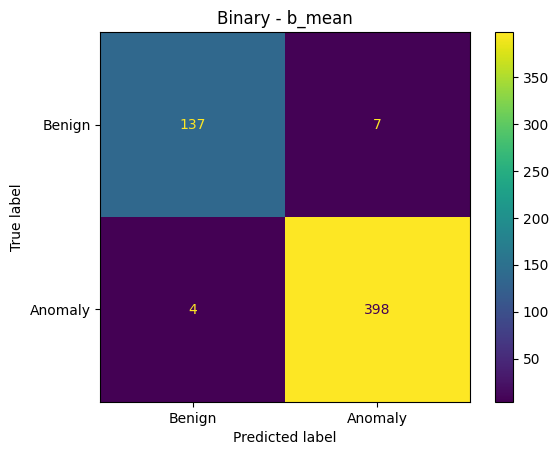

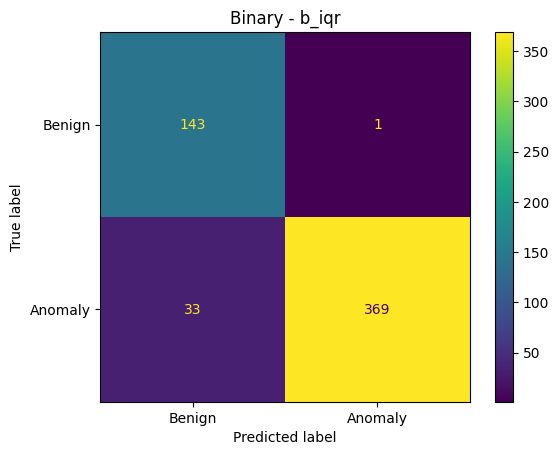

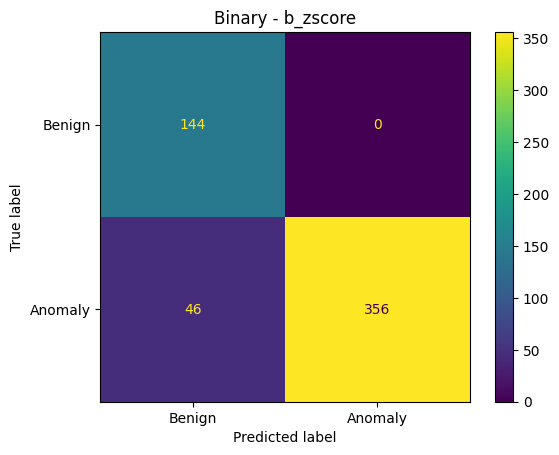

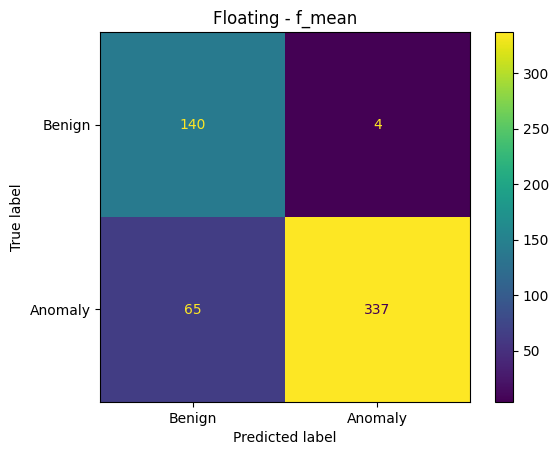

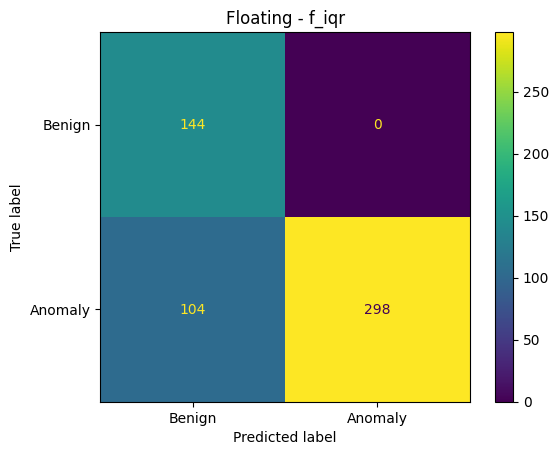

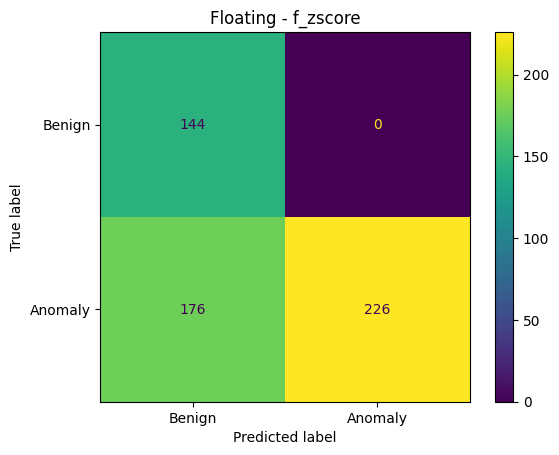

In [44]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

for method in methods:
    if method == 'binary':
        for i in threshold:
            conf_matrix = confusion_matrix(df_pred['Label'], df_pred[i])
            cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels=['Benign', 'Anomaly'])
            cm_display.plot()
            plt.title(f'Binary - {i.strip()}')
            plt.show()
    else:
        for i in threshold_2:
            conf_matrix = confusion_matrix(df_pred['Label'], df_pred[i])
            cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels=['Benign', 'Anomaly'])
            cm_display.plot()
            plt.title(f'Floating - {i.strip()}')
            plt.show()


### F2-Score

In [45]:
score['F2 Score'] = dict()
for method in methods:
    if method == 'binary':
        for i in threshold:
            tn, fp, fn, tp = confusion_matrix(df_pred['Label'], df_pred[i]).ravel()
            f2 = ((1+2**2)*tp)/((1+2**2)*tp+2**2*fn+fp)
            score['F2 Score'][i] = f2
            print(f'F2-Binary-{i}: {f2}')
    else:
        for i in threshold_2:
            tn, fp, fn, tp = confusion_matrix(df_pred['Label'], df_pred[i]).ravel()
            f2 = ((1+2**2)*tp)/((1+2**2)*tp+2**2*fn+fp)
            score['F2 Score'][i] = f2
            print(f'F2-Floating-{i}: {f2}')

F2-Binary-b_mean: 0.9885742672627919
F2-Binary-b_iqr: 0.9327603640040445
F2-Binary-b_zscore: 0.9063136456211812
F2-Floating-f_mean: 0.8645459209851206
F2-Floating-f_iqr: 0.7817418677859391
F2-Floating-f_zscore: 0.6161395856052344


### FPR Score

In [46]:
score['FPR Score'] = dict()
for method in methods:
    if method == 'binary':
        for i in threshold:
            tn, fp, fn, tp = confusion_matrix(df_pred['Label'], df_pred[i]).ravel()
            fpr = fp/(fp+tn)
            score['FPR Score'][i] = fpr
            print(f'FPR-Binary-{i}: {fpr}')
    else:
        for i in threshold_2:
            tn, fp, fn, tp = confusion_matrix(df_pred['Label'], df_pred[i]).ravel()
            fpr = fp/(fp+tn)
            score['FPR Score'][i] = fpr
            print(f'FPR-Floating-{i}: {fpr}')

FPR-Binary-b_mean: 0.04861111111111111
FPR-Binary-b_iqr: 0.006944444444444444
FPR-Binary-b_zscore: 0.0
FPR-Floating-f_mean: 0.027777777777777776
FPR-Floating-f_iqr: 0.0
FPR-Floating-f_zscore: 0.0


In [47]:
from sklearn.metrics import accuracy_score

score['Accuracy Score'] = dict()
for method in methods:
    if method == 'binary':
        for i in threshold:
            acc = accuracy_score(df_pred['Label'], df_pred[i])
            score['Accuracy Score'][i] = acc
            print(f'Accuracy-Binary-{i}: {acc}')
    else:
        for i in threshold_2:
            acc = accuracy_score(df_pred['Label'], df_pred[i])
            score['Accuracy Score'][i] = acc
            print(f'Accuracy-Floating-{i}: {acc}')  

Accuracy-Binary-b_mean: 0.9798534798534798
Accuracy-Binary-b_iqr: 0.9377289377289377
Accuracy-Binary-b_zscore: 0.9157509157509157
Accuracy-Floating-f_mean: 0.8736263736263736
Accuracy-Floating-f_iqr: 0.8095238095238095
Accuracy-Floating-f_zscore: 0.6776556776556777


In [48]:
df_score = pd.DataFrame.from_dict(score)
df_score

,Detection Rate,F2 Score,FPR Score,Accuracy Score
b_mean,0.990050,0.988574,0.048611,0.979853
b_iqr,0.917910,0.932760,0.006944,0.937729
b_zscore,0.885572,0.906314,0.000000,0.915751
f_mean,0.838308,0.864546,0.027778,0.873626
f_iqr,0.741294,0.781742,0.000000,0.809524
f_zscore,0.562189,0.616140,0.000000,0.677656


In [49]:
df_score.to_excel('score_ftp_0.0.xlsx')

In [50]:
# %pip install openpyxl